<a href="https://colab.research.google.com/github/AlidineRemo/microalidine.github.io/blob/main/notebooks/python_crash_course/03_plotting_for_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Python features a large number of visualization libraries.

The most recent ones, like bokeh and holoviews, are very powerful. They allow us to easily create interactive plots that can be displayed in the browser. And the datashader extension makes it possible to show big data without killing the client browser.

Matplotlib, on the other hand, has been around for quite a while and might seem a bit limited with respect to more recent libraries. But most people are still using it (if only at times) and it excels at producing plots of publication quality for articles.

Clearly, you need to know matplotlib if you are to use scientific python at all, in particular for machine learning. So this tutorial will focus on this tool.

To illustrate the basic functionalities of matplotlib, we will work on a toy machine learning problem, and make plots that are actually useful in real life.

The toy problem will be the classification of examples with a single input variable x in two categories, 0 and 1, depending on the value of x.

For each category, the samples will follow the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). This means that they will be distributed according to a Gaussian probability density function (pdf).

Here is the outline:

* [The normal distribution / plotting a function](#The-Normal-Distribution-/-Plotting-a-Function)
* [Cosmetics: title, legend, log scale](#Cosmetics:-Titles,-Legend,-Log-Scale)
* [Machine learning dataset: scatter plot and histograms](#Machine-Learning-Dataset-/-Scatter-Plot-and-Histograms)
* [Showing the model performance](#Showing-the-model-performance)

## The Normal Distribution / Plotting a Function

The normal distribution is available in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) (we could also use the lower-level [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html)) :

In [1]:
from scipy.stats import norm

Like most scientific python tools, [norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) is designed to work with numpy arrays.

The first thing we want to do is to plot the pdf of the normal distribution with matplotlib.

To plot a function f(x), we need to define a number of x values for which the function will be evaluated. With numpy, it is easy to create a numpy array with evenly spaced values in a given range:



In [2]:
import numpy as np
np.set_printoptions(suppress=True, threshold=20)
x = np.linspace(-5,5,101)
x

array([-5. , -4.9, -4.8, ...,  4.8,  4.9,  5. ])

We use 101 values instead of 100 so that the values precisely land where we want them to be (there must be a value at zero).

Then, we evaluate the function for all x values in one go, again thanks to numpy:

In [3]:
# we choose mean=0, sigma=1
# for our gaussian pdf
y = norm.pdf(x, 0., 1.)
y

array([0.00000149, 0.00000244, 0.00000396, ..., 0.00000396, 0.00000244,
       0.00000149])

Finally we can plot y vs x:

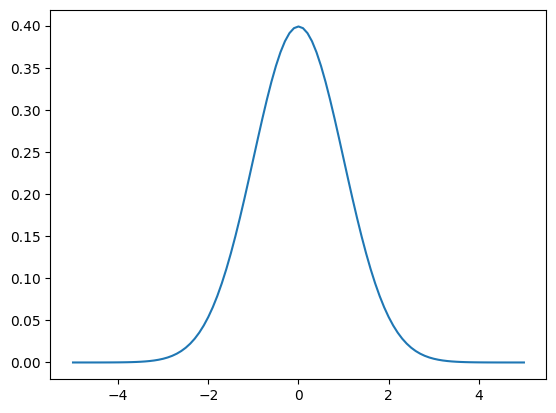

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y)

Matplotlib automatically linked the data in the y and x arrays (which must have the same length), plotted the 101 points, and connected the points with straight lines. This is not visible in the picture given the fairly large number of points.

We did it step-by-step this time, but often, we define y (and sometimes x as well) on the fly:

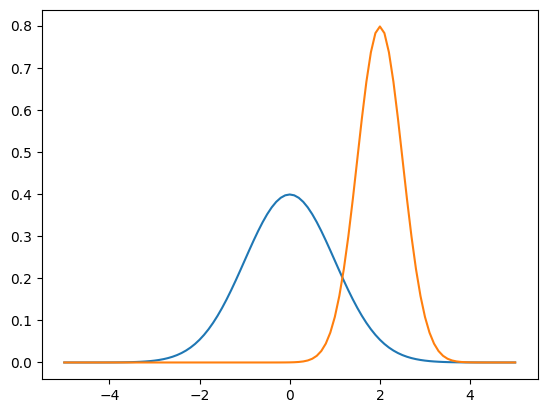

In [5]:
plt.plot(x, norm.pdf(x, 0, 1))
plt.plot(x, norm.pdf(x, 2, 0.5))

Note that matplotlib is clever enough to change the color automatically for the different plots, and to adapt the range of the y axis so that the whole information is visible.

If you're a particle physicist, you know ROOT. I'm not going comment further ;-)

## Cosmetics: Titles, Legend, Log Scale

Scientific plots must be crystal clear, so we need to name our axes, and to add a legend. We can also give a title to the plot. Finally, it's often better to use a log scale on the y axis. Let's do all that:

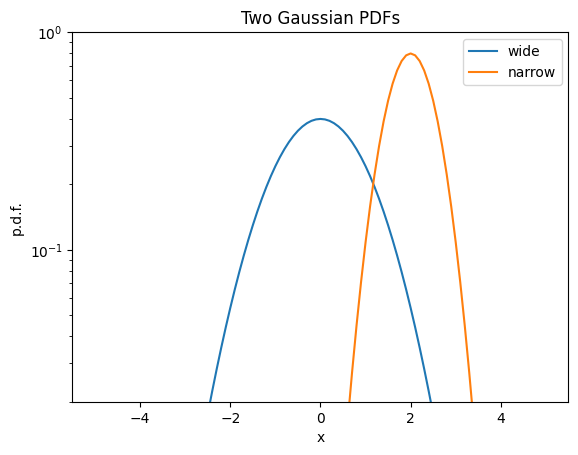

In [6]:
plot = plt.plot(x, norm.pdf(x, 0, 1), label='wide')
plt.plot(x, norm.pdf(x, 2, 0.5), label='narrow')
plt.title('Two Gaussian PDFs')
plt.ylabel('p.d.f.')
plt.xlabel('x')
plt.yscale('log')
# limiting the y axis, or the y axis
# would go down to 10^(- a lot) and
# the lines would be compressed at the top
# of the plot
plt.ylim(0.02, 1)
plt.legend()

## Machine Learning Dataset / Scatter Plot and Histograms

Now that we know what's a normal distribution, we can use it to draw a sample of random values to create a toy dataset.

Our goal is to construct a numpy array with shape (N, 1) for the whole input data, which is a columnar array with a single value for each example, drawn from a gaussian pdf. The examples will come from two categories denoted 0 and 1, corresponding to two different gaussian pdfs.

We also need an array of shape (N,) for the targets, which identify the true category of each example.

We use numpy to draw 100 values from each gaussian pdf:

In [7]:
sigma = 1.
x0 = np.random.normal(-1.5, sigma, 100)
x1 = np.random.normal(1.5, sigma, 100)
x0.shape

(100,)

For now, these arrays don't have the right shape. We have 1D arrays of shape (100,), and we need columnar arrays of shape (100,1). Also, we will need to mix these arrays together to get a complete input data array of shape (200,1).

Before we do this, we create the target arrays for the two categories:

In [8]:
y0 = np.zeros_like(x0)
y1 = np.ones_like(x1)

The two samples can be visualized as a scatter plot, with the category on the y axis:

Text(0, 0.5, 'category')

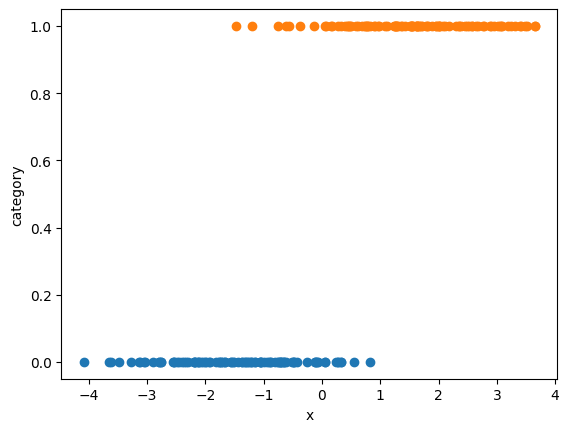

In [9]:
plt.plot(x0, y0,'o')
plt.plot(x1, y1,'o')
plt.xlabel('x')
plt.ylabel('category')

And we can also show histograms. For each category, the histogram has 50 bins, that count the number of examples with a value falling in the bin:

Text(0, 0.5, 'counts')

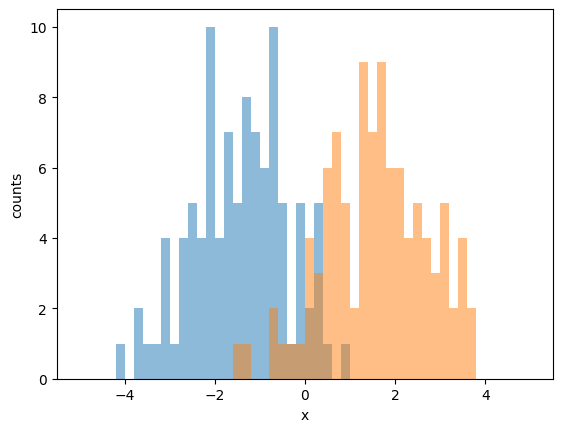

In [10]:
# alpha is the transparency
plt.hist(x0,bins=50, range=(-5,5), alpha=0.5)
plt.hist(x1,bins=50, range=(-5,5), alpha=0.5)
plt.xlabel('x')
plt.ylabel('counts')

Finally, we merge the two samples (both the input data and the targets). For this, we use the handy [np.r_](https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html#numpy.r_) :

In [11]:
x = np.r_['0,2,0', x0, x1]
y = np.concatenate([y0, y1])
print(x)
print(y)

[[-1.37841058]
 [-1.04510631]
 [-3.47291434]
 ...
 [ 2.6842749 ]
 [ 2.51724448]
 [ 1.62260265]]
[0. 0. 0. ... 1. 1. 1.]


## Showing the model performance

In this tutorial, our focus is on plotting, not on machine learning. So we're just going to train a model fast, without trying to understand what we're doing. We'll come back to machine learning in a future tutorial, of course.

To classify our examples, we will use a "logistic regression", as implemented in scikit-learn.

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs').fit(x,y)

That's it! our model has been trained already. We can now evaluate the model for a given x value:

In [13]:
clf.predict_proba([[-3], [3]])

array([[0.99901776, 0.00098224],
       [0.00111886, 0.99888114]])

The trained model gives a probability of almost 100% to category 0 if x=-3, and roughly the same probability to category 1 if x=3. It seems to work!

Now, we want to plot the probability for the whole x range, overlayed to the scatter plot of the examples. We know how to do the scatter plot already, so let's focus on plotting the probability.

The model can be seen as a function of x. So we need to define a linspace for x, and to calculate the corresponding probabilities:

In [14]:
xs = np.linspace(-5, 5, 101)
# xs is a 1D vector, and predict_proba
# takes a columnar array
# as we have seen. So we turn it to a
# columnar array:
cxs = np.c_[xs]
probs = clf.predict_proba(cxs)
probs

array([[0.99998985, 0.00001015],
       [0.99998724, 0.00001276],
       [0.99998396, 0.00001604],
       ...,
       [0.00001827, 0.99998173],
       [0.00001454, 0.99998546],
       [0.00001157, 0.99998843]])

Finally we can do our plot:

Text(0, 0.5, 'probability')

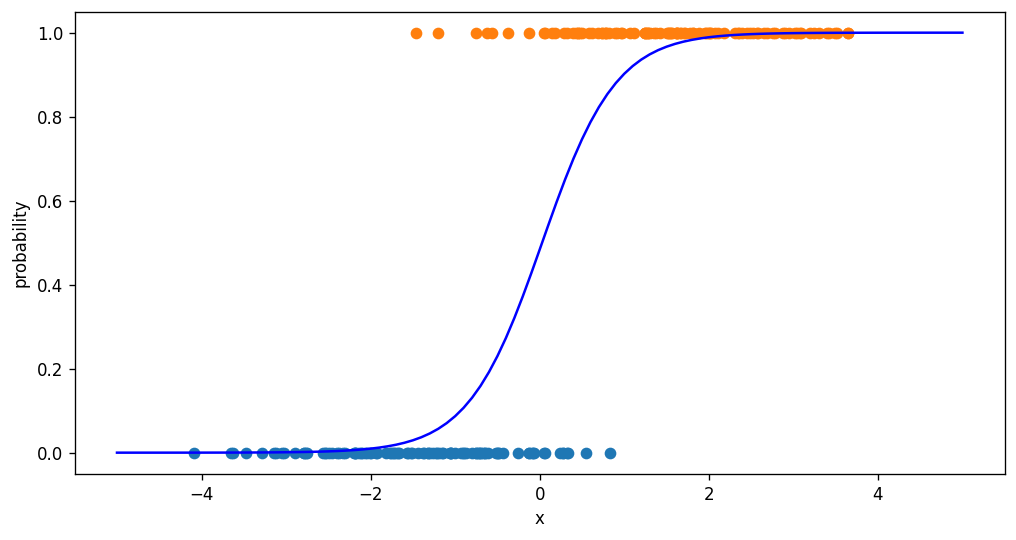

In [15]:
plt.figure(figsize=(10,5), dpi=120)
plt.plot(x0, y0,'o')
plt.plot(x1, y1,'o')
# we select the probability for category 1
plt.plot(xs, probs[:, 1], color='blue')
plt.xlabel('x')
plt.ylabel('probability')

---

*Exercise*

For each category, plot the histogram of predicted probability for category 1. You should get a peak at 0 for category 0, and a peak at 1 for category 1.

Hints: use a numpy boolean mask built with the y array to select entries of a given category in x.

---